## Install and import necessary libraries

In [2]:
!pip install pydriller
import pandas as pd
from pydriller import Repository

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.0/66.0 kB 5.5 MB/s eta 0:00:00


### Myers vs Histogram

In [5]:
import pandas as pd
from pydriller import Repository
import os

def analyze_repos(repo_links, out_csv="consolidated_results.csv"):
    all_file_rows = []

    for repo_link in repo_links:
        repo_name = repo_link.split("/")[-1]
        print(f"\nAnalyzing repository: {repo_name}")

        # Collecting Myers diffs
        file_rows = []
        for commit in Repository(repo_link, only_no_merge = True).traverse_commits():
            for mod in commit.modified_files:
                file_rows.append({
                    'Repository': repo_name,
                    'Commit SHA': commit.hash,
                    'Parent SHA': commit.parents,
                    'Author': commit.author.name,
                    'Commit Message': commit.msg,
                    'Filename': mod.filename,
                    'Old File Path': mod.old_path,
                    'New File Path': mod.new_path,
                    'Change Type': mod.change_type.name,
                    'Diff_Myers': mod.diff
                })


        df_files = pd.DataFrame(file_rows)


        # Collecting Histogram diffs
        hist_diffs = []
        for commit in Repository(repo_link, only_no_merge = True, histogram_diff=True).traverse_commits():
            for mod in commit.modified_files:
                hist_diffs.append(mod.diff)


        df_files['Diff_Histogram'] = hist_diffs
   
        # Adding to consolidated results
        all_file_rows.append(df_files)


    # Concatenating all repos into one DataFrame
    consolidated = pd.concat(all_file_rows, ignore_index=True)


    # Saving CSV
    os.makedirs("output", exist_ok=True)
    out_path = os.path.join("output", out_csv)
    consolidated.to_csv(out_path, index=False)


    print(f"Consolidated dataset saved to {out_path}")
    return consolidated

if __name__ == "__main__":
    repos = [
        "https://github.com/huggingface/datasets",
        "https://github.com/hiyouga/LLaMA-Factory",
        "https://github.com/QuivrHQ/quivr"
    ]
    consolidated_df = analyze_repos(repos)


Analyzing repository: datasets

Analyzing repository: LLaMA-Factory

Analyzing repository: quivr
Consolidated dataset saved to output/consolidated_results.csv


In [6]:
consolidated_df['Discrepancy'] = consolidated_df['Diff_Myers'] != consolidated_df['Diff_Histogram']

In [7]:
consolidated_df.drop(columns=['Repository','Change Type']).head(10)

,Commit SHA,Parent SHA,Author,Commit Message,Filename,Old File Path,New File Path,Diff_Myers,Diff_Histogram,Discrepancy
0,27d9cbb35b71082a6f457d96b5967fe5e5594e72,[],Thomas Wolf,Initial commit,.gitignore,None,.gitignore,"@@ -0,0 +1,28 @@\n+# Compiled python modules.\...","@@ -0,0 +1,28 @@\n+# Compiled python modules.\...",False
1,27d9cbb35b71082a6f457d96b5967fe5e5594e72,[],Thomas Wolf,Initial commit,AUTHORS,None,AUTHORS,"@@ -0,0 +1,8 @@\n+# This is the list of Huggin...","@@ -0,0 +1,8 @@\n+# This is the list of Huggin...",False
2,27d9cbb35b71082a6f457d96b5967fe5e5594e72,[],Thomas Wolf,Initial commit,CONTRIBUTING.md,None,CONTRIBUTING.md,"@@ -0,0 +1,97 @@\n+# How to Contribute\n+\n+Th...","@@ -0,0 +1,97 @@\n+# How to Contribute\n+\n+Th...",False
3,27d9cbb35b71082a6f457d96b5967fe5e5594e72,[],Thomas Wolf,Initial commit,LICENSE,None,LICENSE,"@@ -0,0 +1,202 @@\n+\n+ ...","@@ -0,0 +1,202 @@\n+\n+ ...",False
4,27d9cbb35b71082a6f457d96b5967fe5e5594e72,[],Thomas Wolf,Initial commit,README.md,None,README.md,"@@ -0,0 +1,268 @@\n+# HuggingFace Datasets\n+\...","@@ -0,0 +1,268 @@\n+# HuggingFace Datasets\n+\...",False
5,27d9cbb35b71082a6f457d96b5967fe5e5594e72,[],Thomas Wolf,Initial commit,glue.py,None,datasets/glue.py,"@@ -0,0 +1,592 @@\n+# coding=utf-8\n+# Copyrig...","@@ -0,0 +1,592 @@\n+# coding=utf-8\n+# Copyrig...",False
6,27d9cbb35b71082a6f457d96b5967fe5e5594e72,[],Thomas Wolf,Initial commit,aeslc.py,None,datasets/nlp/aeslc/aeslc.py,"@@ -0,0 +1,119 @@\n+# coding=utf-8\n+# Copyrig...","@@ -0,0 +1,119 @@\n+# coding=utf-8\n+# Copyrig...",False
7,27d9cbb35b71082a6f457d96b5967fe5e5594e72,[],Thomas Wolf,Initial commit,amazon_us_reviews.py,None,datasets/nlp/amazon_us_reviews/amazon_us_revie...,"@@ -0,0 +1,174 @@\n+# coding=utf-8\n+# Copyrig...","@@ -0,0 +1,174 @@\n+# coding=utf-8\n+# Copyrig...",False
8,27d9cbb35b71082a6f457d96b5967fe5e5594e72,[],Thomas Wolf,Initial commit,big_patent.py,None,datasets/nlp/big_patent/big_patent.py,"@@ -0,0 +1,286 @@\n+# coding=utf-8\n+# Copyrig...","@@ -0,0 +1,286 @@\n+# coding=utf-8\n+# Copyrig...",False
9,27d9cbb35b71082a6f457d96b5967fe5e5594e72,[],Thomas Wolf,Initial commit,billsum.py,None,datasets/nlp/billsum/billsum.py,"@@ -0,0 +1,121 @@\n+# coding=utf-8\n+# Copyrig...","@@ -0,0 +1,121 @@\n+# coding=utf-8\n+# Copyrig...",False


In [8]:
# Categorizing files
def categorize_file(filename):
    if pd.isna(filename):
        return "Other"
    fname = filename.lower()
   
    # README
    if "readme" in fname:
        return "README"
   
    # LICENSE
    if "license" in fname:
        return "LICENSE"
   
    # Test files
    if "test" in fname:
        return "Test Code"
   
    # Source code (The repository has only python language)
    if fname.split(".")[-1]=='py':
        return "Source Code"
   
    return "Other"
consolidated_df["File_category"] = consolidated_df["Filename"].apply(categorize_file)

In [9]:
req_df = consolidated_df[(consolidated_df["File_category"]=='Source Code')&(consolidated_df['Discrepancy'])]
print(req_df['Diff_Myers'].iloc[0])
print(req_df['Diff_Histogram'].iloc[0])

@@ -34,33 +34,23 @@ The main library entrypoints are:
 __version__ = "0.0.1"
 
 # Types are pyarrow types
-from pyarrow import (null, bool_,
-                     int8, int16, int32, int64,
-                     uint8, uint16, uint32, uint64,
-                     time32, time64, timestamp, date32, date64, duration,
-                     float16, float32, float64,
-                     binary, string, utf8,
-                     large_binary, large_string, large_utf8,
-                     decimal128,
-                     list_, large_list, map_, struct, union, dictionary)
-from pyarrow import total_allocated_bytes
-
-from . import download, features, load, datasets
-from .load import builder, load
-from .download import GenerateMode
+from pyarrow import (binary, bool_, date32, date64, decimal128, dictionary,
+                     duration, float16, float32, float64, int8, int16, int32,
+                     int64, large_binary, large_list, large_string, large_utf8,
+                 

Mismatch Statistics:
      Category  Mismatches
0      LICENSE           0
1        Other         334
2       README          92
3  Source Code         726
4    Test Code          68


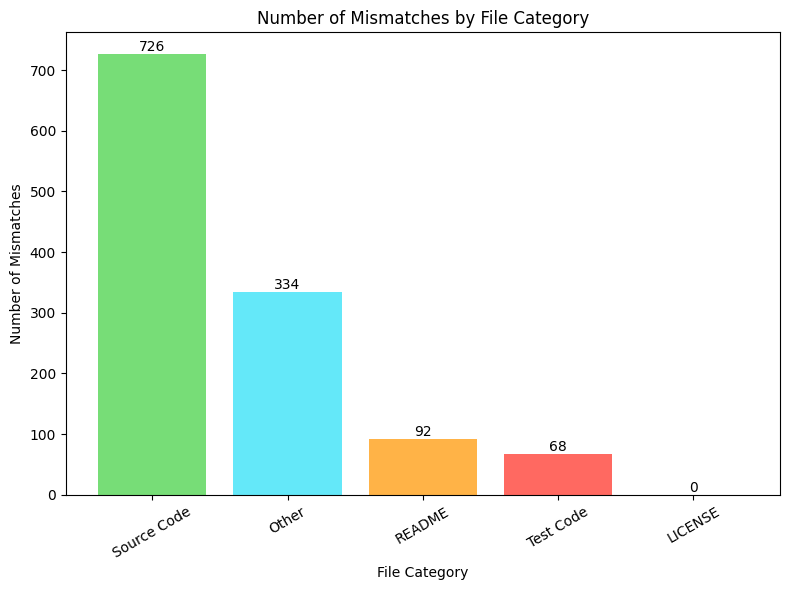

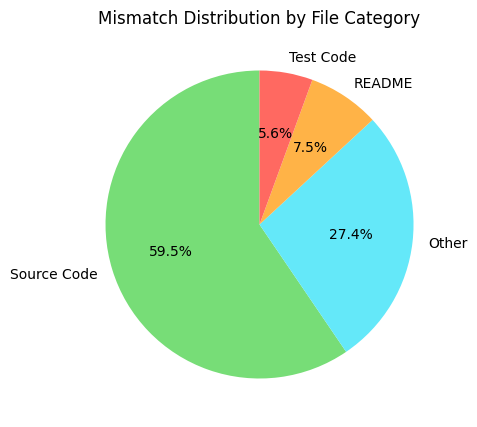

In [12]:
stats = consolidated_df.groupby("File_category")["Discrepancy"].sum().reset_index()
stats.columns = ["Category", "Mismatches"]

# Saving stats to CSV
os.makedirs("output", exist_ok=True)
stats.to_csv("output/mismatch_stats.csv", index=False)

print("Mismatch Statistics:")
print(stats.head())

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

colors = ["#77DD77","#64E8F9", "#FFB347", "#FF6961",
          "#AEC6CF", "#FDFD96", "#CBAACB"]
stats_sorted = stats.sort_values(by="Mismatches",ascending = False)

# # Use light colors (from a colormap)
# colors = cm.GnBu(np.linspace(0, 1, len(stats_sorted)))

# --- Bar plot ---
plt.figure(figsize=(8,6))
bars = plt.bar(stats_sorted["Category"], stats_sorted["Mismatches"], color=colors)

# Add count labels above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,   # X position (center of bar)
        height,                            # Y position (top of bar)
        f"{int(height)}",                  # Label (integer value)
        ha="center", va="bottom", fontsize=10
    )

plt.title("Number of Mismatches by File Category")
plt.xlabel("File Category")
plt.ylabel("Number of Mismatches")
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig("output/mismatch_barplot.png",transparent=True)
plt.show()

# --- Pie chart (remove 0%) ---
nonzero_stats = stats_sorted[stats_sorted["Mismatches"] > 0]
# colors_pie = cm.GnBu(np.linspace(0, 1, len(nonzero_stats)))

plt.figure(figsize=(5,5), facecolor='none')
plt.pie(
    nonzero_stats["Mismatches"], 
    labels=nonzero_stats["Category"], 
    autopct="%1.1f%%", 
    startangle=90,
    colors=colors
)
plt.title("Mismatch Distribution by File Category")
plt.savefig("output/mismatch_piechart.png", transparent=True)
plt.show()

In [23]:
print("Total Modified files:",len(consolidated_df))
print("Total Mismatches:",consolidated_df["Discrepancy"].sum())
print(f"Total Mismatch percent: {round(consolidated_df['Discrepancy'].sum()/len(consolidated_df)*100,2)}%")

Total Modified files: 66099
Total Mismatches: 1220
Total Mismatch percent: 1.85%
